# PROBLEM STATEMENT
### Implement a KNN model to classify the animals in to categorie.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# importing basic labries

In [4]:
data= pd.read_csv('Zoo.csv')
#Loading data

In [5]:
# making copy of data
df= data.copy()

# DATA EXPLORATION:

In [7]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [10]:
df.shape

(101, 18)

In [9]:
df.sample(5)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
13,clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7
43,lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
49,mole,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
28,giraffe,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [13]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [15]:
df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

<Axes: xlabel='type', ylabel='count'>

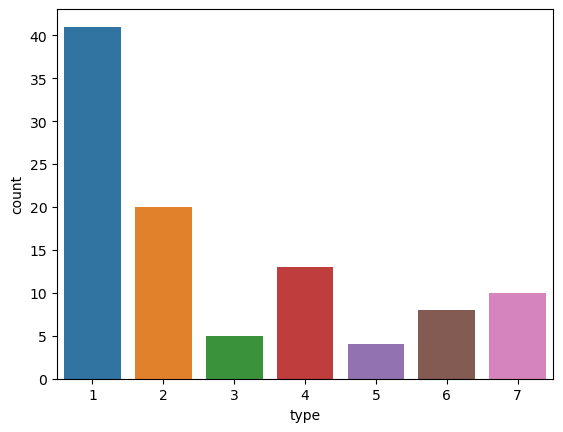

In [16]:
sns.countplot(df, x='type')

###### Here we can see that highest number of animals present in ZOO are of type 1 then type 2 followed by type 4,7,6,3 and 5

 # DATA PROCESSING
 ###### Identifying Duplicates:

In [17]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [18]:
# there is no diplicate value in data

###### Indetifying Null Values:

In [19]:
df.isnull()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [22]:
# There is no missing value in given data set

### Indetifying Outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'hair'),
  Text(1, 0, 'feathers'),
  Text(2, 0, 'eggs'),
  Text(3, 0, 'milk'),
  Text(4, 0, 'airborne'),
  Text(5, 0, 'aquatic'),
  Text(6, 0, 'predator'),
  Text(7, 0, 'toothed'),
  Text(8, 0, 'backbone'),
  Text(9, 0, 'breathes'),
  Text(10, 0, 'venomous'),
  Text(11, 0, 'fins'),
  Text(12, 0, 'legs'),
  Text(13, 0, 'tail'),
  Text(14, 0, 'domestic'),
  Text(15, 0, 'catsize'),
  Text(16, 0, 'type')])

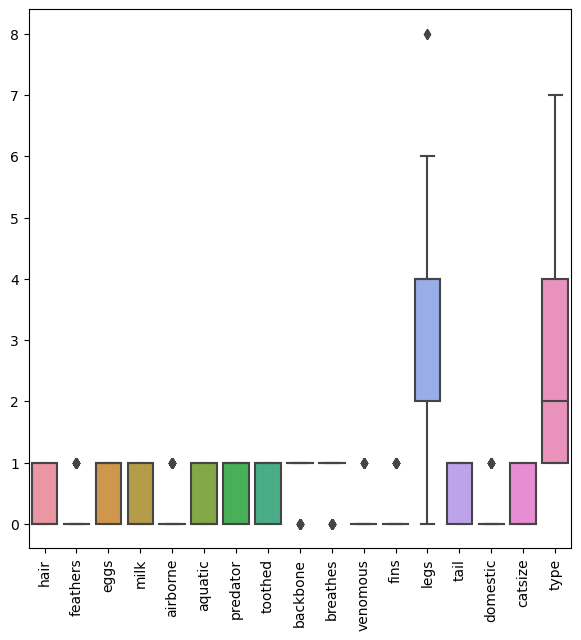

In [27]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df)
plt.xticks(rotation=90)

In [28]:
#REMOVE UNNECESSARY COLUMNS

In [29]:
df= df.drop(['animal name'],axis=1)

In [30]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# DATA VISUALIZATION

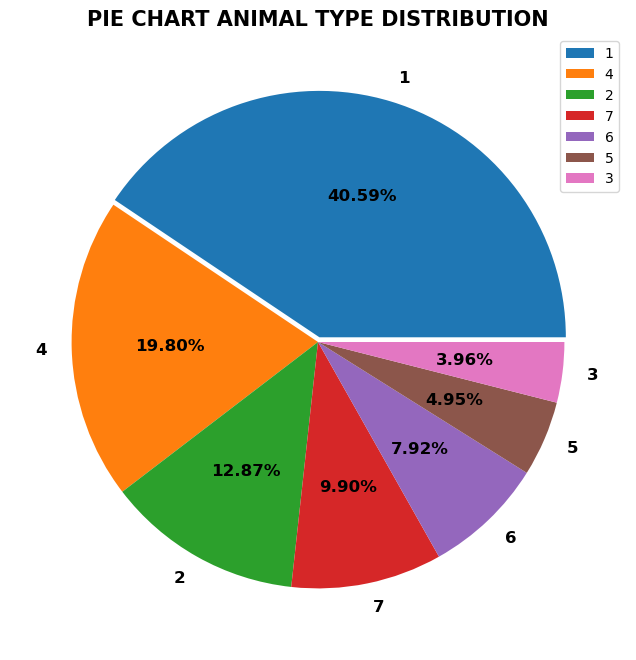

In [32]:
plt.figure(figsize=(8,8))
plt.pie(df['type'].value_counts(), labels=df.type.unique(),
       explode=[0.02,0.0,0.0,0.0,0.0,0.0,0.0], autopct='%.2f%%',
       textprops={'size':'large','fontweight':'bold'})
plt.legend(loc='upper right')
plt.title("PIE CHART ANIMAL TYPE DISTRIBUTION",fontsize=15, fontweight='bold')
plt.show()

<Axes: >

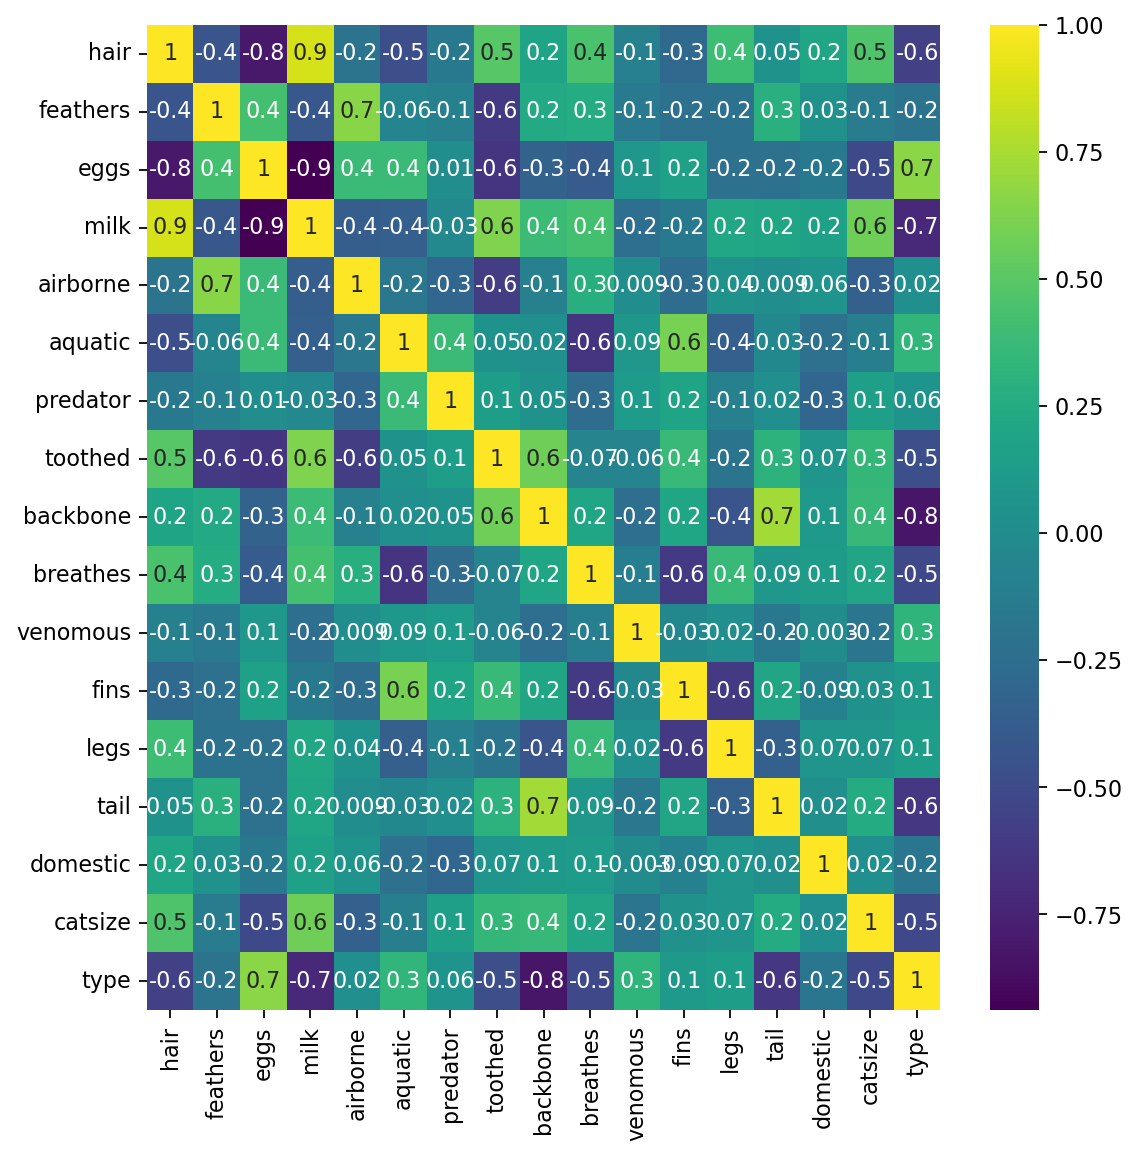

In [35]:
plt.figure(figsize=(8,8),dpi=160)
sns.heatmap(df.corr(),annot=True, cmap='viridis',fmt='.01g')

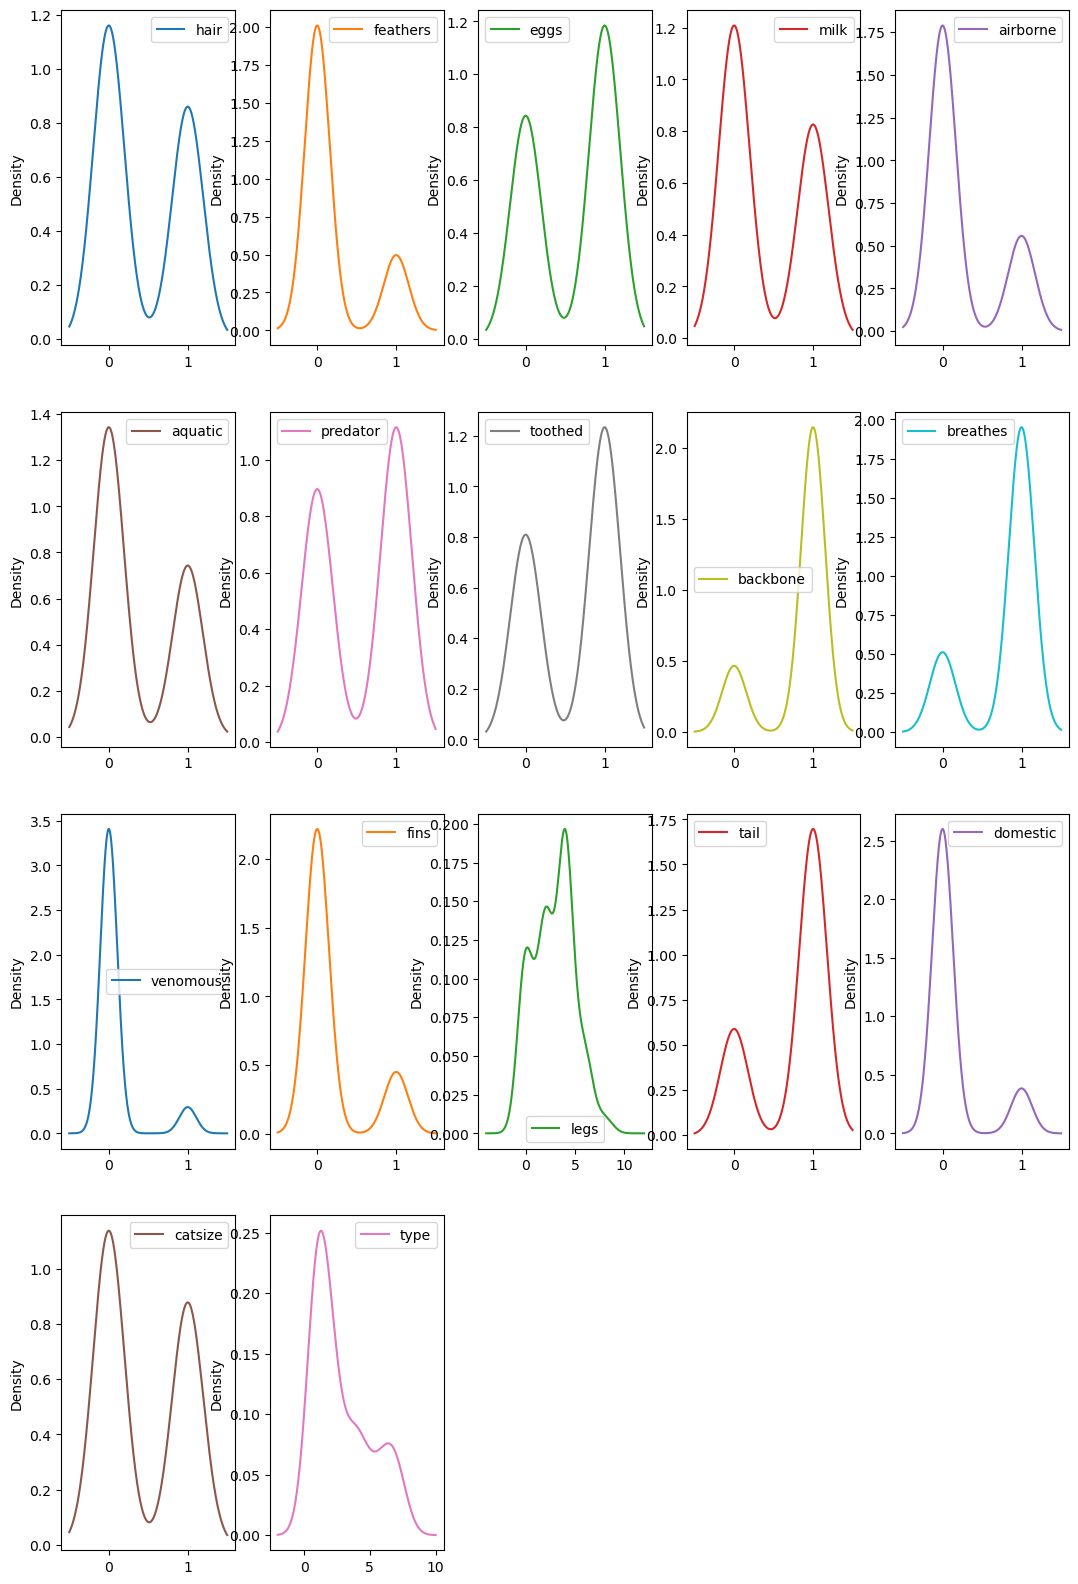

In [36]:
df.plot(kind='density',subplots=True,layout=(4,5),figsize=(13,20),sharex=False, sharey=False)
plt.show()

# DATA SPLTTING

In [37]:
X= df.drop('type', axis=1)
y=df['type']

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

In [42]:
print("shape of X_train:", X_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of X_train: (80, 16)
shape of X_test: (21, 16)
shape of y_train: (80,)
shape of y_test: (21,)


# FEATURE SCALING

In [43]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler= StandardScaler()

In [46]:
scaled_X_train= scaler.fit_transform(X_train)

In [47]:
scaled_X_test= scaler.fit_transform(X_test)

# MODEL SELECTION

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier()

In [50]:
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [51]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [52]:
y_pred=knn.predict(scaled_X_test)

In [53]:
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

# MODEL EVALUATION

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay

In [55]:
accuracy_score(y_test,y_pred)

0.9523809523809523

In [56]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

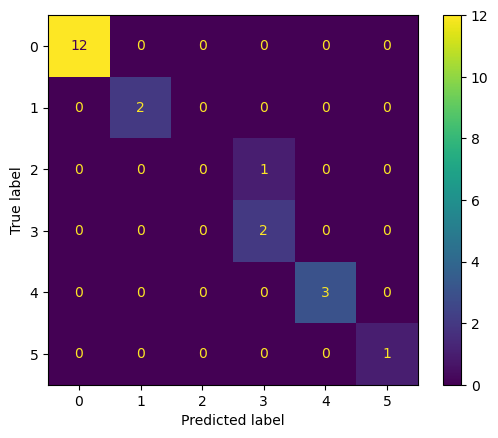

In [57]:
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PIPELINE

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
operations=[('scaler',scaler),('knn', knn)]

In [61]:
pipe= Pipeline(operations)

# CROSS VALIDATION 

In [62]:
from sklearn.model_selection import GridSearchCV

In [68]:
k_values= list(range(1,30))
param_grid={'knn__n_neighbors': k_values}

In [69]:
full_cv_classifier=  GridSearchCV(pipe,param_grid, scoring='accuracy',cv=3)

In [70]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [72]:
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [73]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=4))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=4),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 4,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [74]:
full_cv_classifier.cv_results_

{'mean_fit_time': array([0.01042859, 0.00520794, 0.        , 0.00520754, 0.        ,
        0.        , 0.00520754, 0.00520849, 0.        , 0.00520802,
        0.00520754, 0.01041508, 0.01041547, 0.        , 0.00520738,
        0.00520778, 0.00520794, 0.00520794, 0.00520794, 0.00520817,
        0.00521501, 0.0052073 , 0.        , 0.00520794, 0.01041524,
        0.0052073 , 0.00520802, 0.00520778, 0.0052077 ]),
 'std_fit_time': array([0.00737414, 0.00736513, 0.        , 0.00736457, 0.        ,
        0.        , 0.00736457, 0.00736592, 0.        , 0.00736525,
        0.00736457, 0.00736457, 0.00736485, 0.        , 0.00736435,
        0.00736491, 0.00736513, 0.00736513, 0.00736513, 0.00736547,
        0.00737514, 0.00736423, 0.        , 0.00736513, 0.00736468,
        0.00736423, 0.00736525, 0.00736491, 0.0073648 ]),
 'mean_score_time': array([0.10933431, 0.11455584, 0.12497067, 0.11455584, 0.12497044,
        0.12497036, 0.11455639, 0.11455456, 0.11976353, 0.11976322,
        0.114555

In [75]:
pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score']

0     0.912631
1     0.911681
2     0.924976
3     0.924976
4     0.912156
5     0.886990
6     0.837607
7     0.837607
8     0.787749
9     0.824786
10    0.812441
11    0.812441
12    0.812441
13    0.811966
14    0.799620
15    0.799620
16    0.799620
17    0.799620
18    0.786800
19    0.761633
20    0.749288
21    0.749288
22    0.711776
23    0.687085
24    0.687085
25    0.699430
26    0.625356
27    0.599715
28    0.599715
Name: mean_test_score, dtype: float64

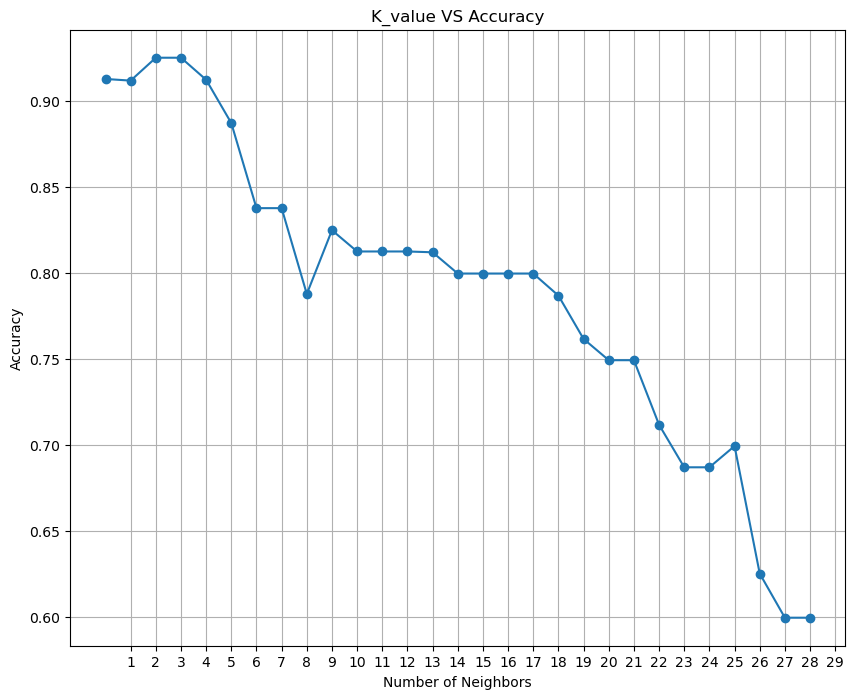

In [76]:
plt.figure(figsize=[10,8])
plt.plot(pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score'], marker='o', markersize=6)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('K_value VS Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

###### The peak of the curve is around K=5.
###### This suggests that using 5 neighbors as the K value would likely result in the highest accuracy for this specific dataset.

# MODEL EVALUATION

In [77]:
y_pred=full_cv_classifier.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred)

0.9523809523809523

In [79]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

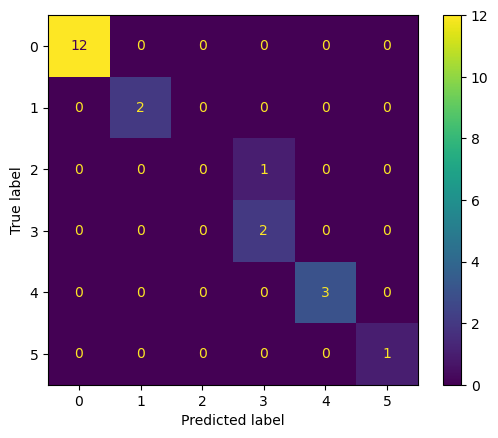

In [80]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MODEL DEPLOYMENT

In [82]:
# from joblib import dump, load

In [ ]:
# dump(final_model, 'knn_model.joblib')